In [1]:
import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])


In [2]:
df = df.transpose()

In [3]:
# calculating 95% CI for each year, Z-value 1.96
import math

mean = list(df.mean())
std = list(df.std())
CI = []
for i in range (4) :
    CI.append(1.96*(std[i]/math.sqrt(len(df))))
    

In [4]:
nearest_value = 100
Y = 39500
df1= pd.DataFrame()

df1['difference'] = nearest_value*((Y - df.mean())//nearest_value)

df1['sign'] = df1['difference'].abs()/df1['difference']

old_range = abs(df1['difference']).min(), df1['difference'].abs().max()

new_range = .5,1

df1['shade'] = df1['sign']*np.interp(df1['difference'].abs(), old_range, new_range)

df1

,difference,sign,shade
1992,6100.0,1.0,0.867470
1993,-2400.0,-1.0,-0.644578
1994,0.0,NaN,NaN
1995,-8300.0,-1.0,-1.000000


In [5]:
# changing color of the bars with respect to Y


shade = list(df1['shade'])
from matplotlib import cm
blues = cm.Blues
reds = cm.Reds
# using shades blues when diff is pos
# using Reds when when diff is neg


color = ['White' if  x == 0 else reds(abs(x))
         if x<0 else blues(abs(x)) for x in shade]

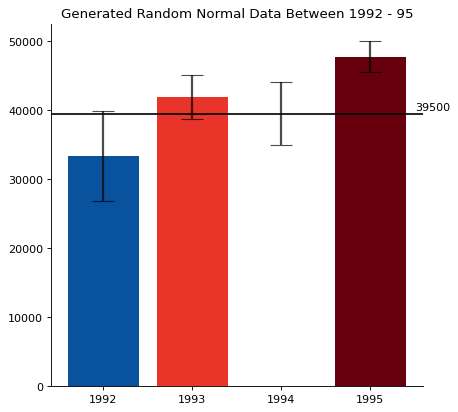

In [9]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')

plt.bar(range(len(df.columns)), height = df.values.mean(axis = 0), 
        yerr=CI, error_kw={'capsize': 10, 'elinewidth': 2, 'alpha':0.7}, color = color)

plt.axhline(y=Y, color = 'black', label = 'Y')

plt.text(3.5, 40000, "39500")

plt.xticks(range(len(df.columns)), df.columns)

plt.title('Generated Random Normal Data Between 1992 - 95')

# remove all the ticks (both axes), and tick labels on the Y axis
# plt.tick_params(top='off', bottom='off',  right='on', labelbottom='on',left ='off')

#removing frames
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("")